# Problem Statement 

The data set from  [UC Irvine’s Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) includes direct marketing campaigns (i.e. phone calls) of a Portuguese banking institution. The goal is to predict if the client will subscribe a term deposit (indicated in the y variable). The task is to create a model that will help this banking institution determine, in advance, clients who will be receptive to such marketing campaigns. Clearly state the metric used for this problem.


# Dataset description

Data was dowloaded from: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (‘yes’) or not (‘no’) subscribed.

There are four datasets:

1. `bank-additional-full.csv` with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]<br>
2. `bank-additional.csv` with 10% of the examples (4119), randomly selected from 1), and 20 inputs.<br>
3. `bank-full.csv` with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).<br>
4. `bank.csv` with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). <br>
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


For this analysis I will use Dataset 1(`bank-additional-full.csv`) which is most recent and comprehensive.



Attribute Information:

Input variables:
 - bank client data:<br>
1 - age (numeric) <br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br><br>
 - related with the last contact of the current campaign:<br>
8 - contact: contact communication type (categorical: 'cellular','telephone')<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br><br>
 - other attributes:<br>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br><br>
 - social and economic context attributes: <br>
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)<br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

 - Output variable (desired target):<br>
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')<br>

# Exploratory Data Analysis

In [1]:
# # Mount the Google Drive

# from google.colab import drive
# drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# Load packages 

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,7)
plt.rc('font', size=15)
plt.rc('axes', axisbelow=True)

In [3]:
data = pd.read_csv('data/bank-additional-full.csv', sep = ';')

Lets have a birds eye view of the dataset

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
data.shape

(41188, 21)

In [6]:
print('The number of data points and features in the dataset are {0} and {1} respectively'.format(data.shape[0], (data.shape[1]-1)))

The number of data points and features in the dataset are 41188 and 20 respectively


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

There are 10 categorical features and 10 numeric and 1 target variable y. It looks like there are no Missing (NaN) values in the dataset. Lets have a closer look at each feature.

As a first step of data exploration its important to look out for 
1. Missing values (I noticed above there are no missing values)
2. Duplicate rows(If there are duplicate entries, I need to delete one of those rows) 

In [8]:
data[data.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


There are 12 duplicate entries. Lets remove them and move on with the rest of the dataset.

In [9]:
data = data.drop_duplicates().reset_index(drop=True)

`y` is quite commonly use in plotting to represent the y axis. To avoid such confusion I will rename y column to target.

In [10]:
data = data.rename(columns = {'y':'target'})

Let us look at each feature one by one. My intention is to look at the data with open mind and see if there are obvious patterns. I will start with the Target and then look at the features.

## Target (y)

In [11]:
data.target.value_counts()

no     36537
yes     4639
Name: target, dtype: int64

In [12]:
data.target.value_counts(normalize=True) 


no     0.887337
yes    0.112663
Name: target, dtype: float64

<BarContainer object of 2 artists>

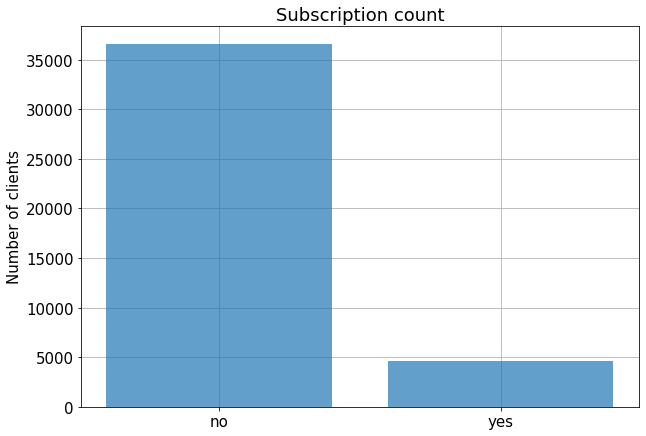

In [13]:
x = data.target.value_counts().index.astype('str')
y = data.target.value_counts().values
plt.title('Subscription count')
plt.ylabel('Number of clients')
plt.grid()
plt.bar(x,y, alpha = 0.7)

Highly imbalanced dataset. The number of clients who did not subscribe (NO) is ~89 % and the clients who subscribed (YES) are only 11%. We need to be careful  of this. Many predictive algorithms will be biased towards prediction of one class(NO). Even if I randomly predict everything as Not subscribed (NO) I will still get 89% accuracy. But that model accuracy is not reliable. Any splitting of data I do, needs to account for this imbalance. 

Handling Imbalanced dataset: <br>
There are couple of ways to handle the imbalanced datasets. <br>
1. Data Level approach <br>
It means resampling the data using various techniques. We can Upsample(create more samples of minority class) or Downsample(bring down the majority class). There are smart techniques to oversample the data, most prominent being SMOTE, MSMOTE and Cluster based oversampling(KMeans).
2. Algorithmic approach <br>
In this approach we do not modify the dataset rather we focus on improving the model predictability using various algorithms. Examples are Bagging based techniques(reduce overfitting of string learners to improve the predictions) and Boosting based algorithms(improving the accurcay of the weak learners). <br>

There is no one solution that would gaurantee good results. My intention here is to first finish the end to end modeling workflow, look at the results and if the predictions are not up to the expectation of the stakeholders, then try implementing the above solutions. The evaluation metric depends on the business application. There is one metric that has advantage of being independent of the class frequency or specific false positive/negative costs. It is also immune to how many positive or negative classes are there. That is an AUC curve, ideal model should have an AUC of 1.0, while an AUC of 0.5 corresponds to a random classifier.


Also its worth highlighting that our dataset does not fall into the category of severe imbalance. In general according to this paper 


URL: https://journalofbigdata.springeropen.com/articles/10.1186/s40537-019-0274-4#:~:text=Severely%20imbalanced%20data%2C%20also%20known,10%2C000%3A1%20%5B5%5D.


when the ratio of two classses is 1: 100 or even low 1:1000 that is when we consider it as severe imbalance. In such cases the evaluation metric that is generally recommended is PR Recall curve. 

## Bank client data 

Let us look at the features now. First, I will take all the features related to client data. I notice most of these features have data type object. Lets check out the proportions of each of the category of clients in our dataset. Lets see if there is any obvious pattern of who we are approaching more and how that impacts the conversion rate. The conversion rate can be one of the KPIs.

In [14]:
data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Age

In [15]:
data.age.describe()

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

Text(0.5, 1.0, 'Distribution of age for Clients')

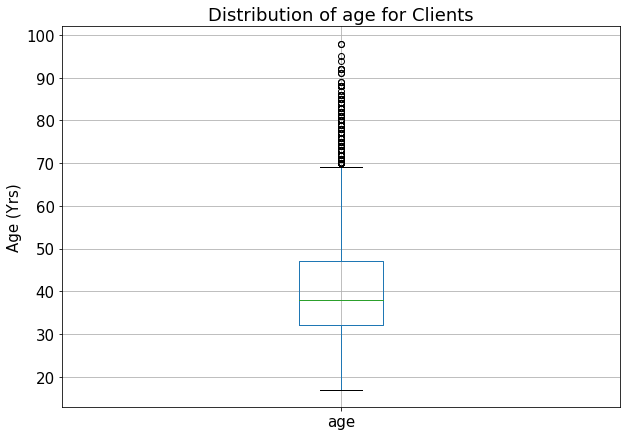

In [95]:
data.boxplot('age')
plt.ylabel('Age (Yrs)')
plt.title('Distribution of age for Clients')

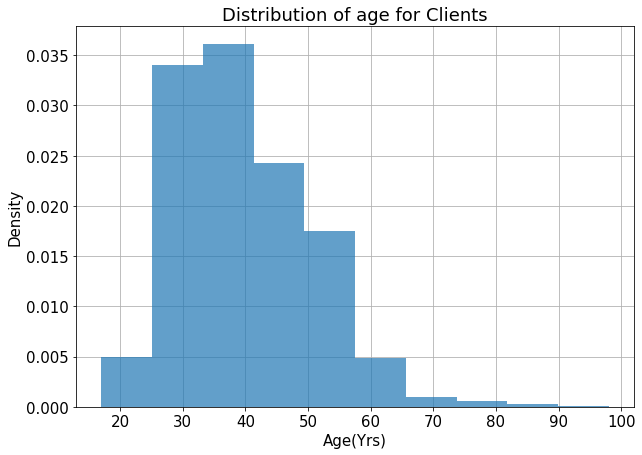

In [76]:
plt.hist(data.age, density = True, alpha = 0.7)
plt.ylabel('Density')
plt.xlabel('Age(Yrs)')
plt.title('Distribution of age for Clients')
plt.grid()
plt.show()

Was the average age different between those that subscribed and those that did not?

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


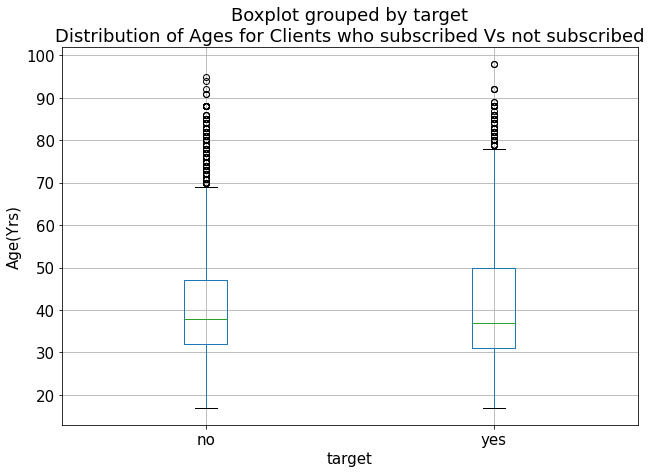

In [18]:
data.boxplot(column=['age'], by='target')
plt.title('Distribution of Ages for Clients who subscribed Vs not subscribed')
plt.ylabel('Age(Yrs)')
plt.show()

Some statistics of the two groups 

In [79]:
data.groupby('target').age.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
no,36537.0,39.910994,9.897176,17.0,32.0,38.0,47.0,95.0
yes,4639.0,40.912266,13.838838,17.0,31.0,37.0,50.0,98.0


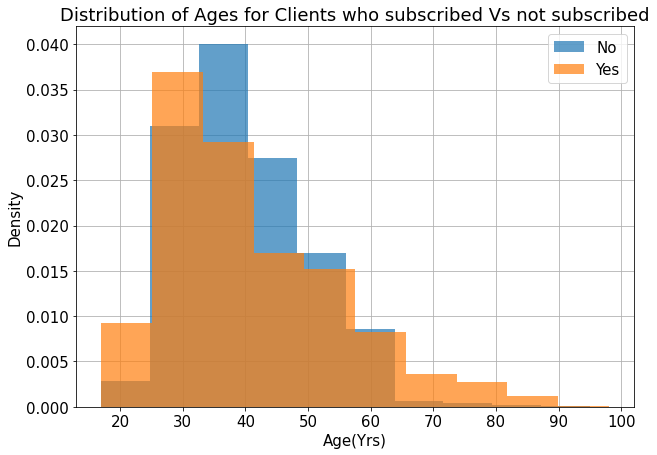

In [75]:
plt.hist(data[data.target == 'no'].age, density = True, alpha = 0.7, label = 'No')
plt.hist(data[data.target == 'yes'].age, density = True, alpha = 0.7, label = 'Yes')
plt.ylabel('Density')
plt.xlabel('Age(Yrs)')
plt.title('Distribution of Ages for Clients who subscribed Vs not subscribed')
plt.grid()
plt.legend()
plt.show()

Lets also look at the qq plot. Refer: https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot

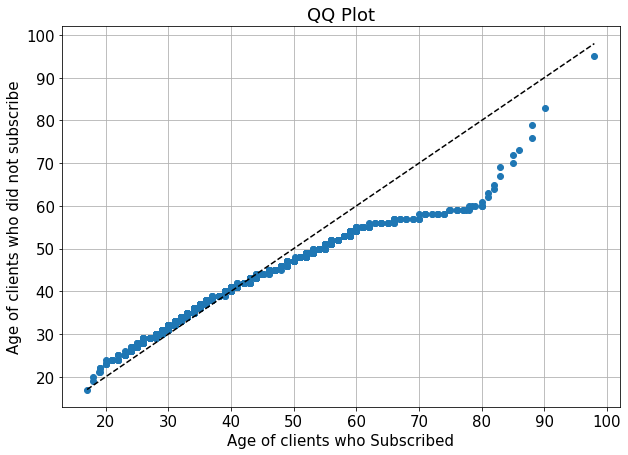

In [97]:
min_val = data.age.min()
max_val = data.age.max()
plt.scatter(np.quantile(data[data.target == 'yes'].age,np.linspace(0,1,1000)),
np.quantile(data[data.target == 'no'].age,np.linspace(0,1,1000)))
plt.plot([min_val,max_val], [min_val,max_val], linestyle='--', color='k')
plt.xlabel('Age of clients who Subscribed')
plt.ylabel('Age of clients who did not subscribe')
plt.title('QQ Plot')
plt.grid()


The age values look realistic to me. 75% percentile is 47 that means only 25% clients are above age of 47. The oldest client is 98 years old.Interestingly the youngest client is 17 years old. Due to lack of evidence and the age values look realistic I will assume the data entries are okay . There is no significant difference in the age for clients who subscribed vs did not subscribe. The mean and median age for the two cases are very close. Ideally the more difference in the distribution the more likely it is for this feature to be a strong predictor. 

Conceptually, the ANOVA test can be done to verify if the numeric feature has some predictive power towards the target. In that case we are essentially trying to verify that the population mean of the the variable for the two categories has statistically significant difference. My sense is that in this case it wont show any substantial difference as the two means look pretty similar. 

Let us look at other features.

### job

In [22]:
def category_proportion_conversion_plot(feature):

  """
  Generates two plots 
  
  1. Count of each category within the feature under consideration, 
  for example when the feature under consideration is job this function 
  generates a bar plot of how many categories of job were there in the dataset. 
  
  2. Plot of the conversion rate of each category for the feature under consideration.
  Returns a dataframe.
  
  Parameters
  ----------
  feature: Takes a categorical feature input

  Returns
  -------
  Outputs two plots.
  """

  fig = plt.figure(figsize=(30, 7))
  plt.rc('font', size=15)
  plt.rc('axes', axisbelow=True)

  # Plot of counts category contacted

  sub1 = plt.subplot(1,2,1)
  group = data[feature].value_counts(normalize = False)
  x = group.keys()
  y = group.values 
  plt.bar(x, y,alpha=0.8)
  plt.title('Number of clients within each ' + feature + ' category ')
  plt.xticks(rotation=90)

  for index, value in enumerate(y):
      plt.text(index-0.15, value+150, str(value), rotation = 0,fontsize=11)

  plt.grid()
  plt.tight_layout()

  # Plot of conversion rate 

  sub1 = plt.subplot(1,2,2)
  subscription_proportions = data.groupby(feature).target.value_counts(normalize = True).reset_index(name='percent')
  conversion_rate = subscription_proportions[subscription_proportions.target == 'yes'].reset_index(drop = True)
  conversion_rate = conversion_rate.set_index(feature).reindex(index=group.keys()).reset_index().rename(columns = {'index':feature})
  x = conversion_rate[feature]
  y = conversion_rate.percent 
  plt.bar(x, y,alpha=0.8)
  plt.title('Conversion rate in this campaign wrt ' + feature + ' category')
  plt.xticks(rotation=90)
  for index, value in enumerate(y):
      value_truncated = round(round(value,5)* 100,2)
      plt.text(index-0.15, value+0.005, str(value_truncated ) +str('%'), rotation = 0,fontsize=11)
  plt.grid()
  plt.tight_layout()

  plt.show()


def group_comparison(feature,title_input):

  df = data.groupby('target')[feature].value_counts(normalize = True).reset_index(name = 'percent')

  fig = plt.figure(figsize=(15, 5))
  plt.rc('font', size=15)
  plt.rc('axes', axisbelow=True)
  sub1 = plt.subplot(1,1,1)
  sns.barplot(data=df, x=feature, hue='target', y='percent', alpha = 0.7)
  plt.ylabel('proportion')
  plt.title(title_input)
  plt.xticks(rotation=90)
  plt.grid()

  plt.show()

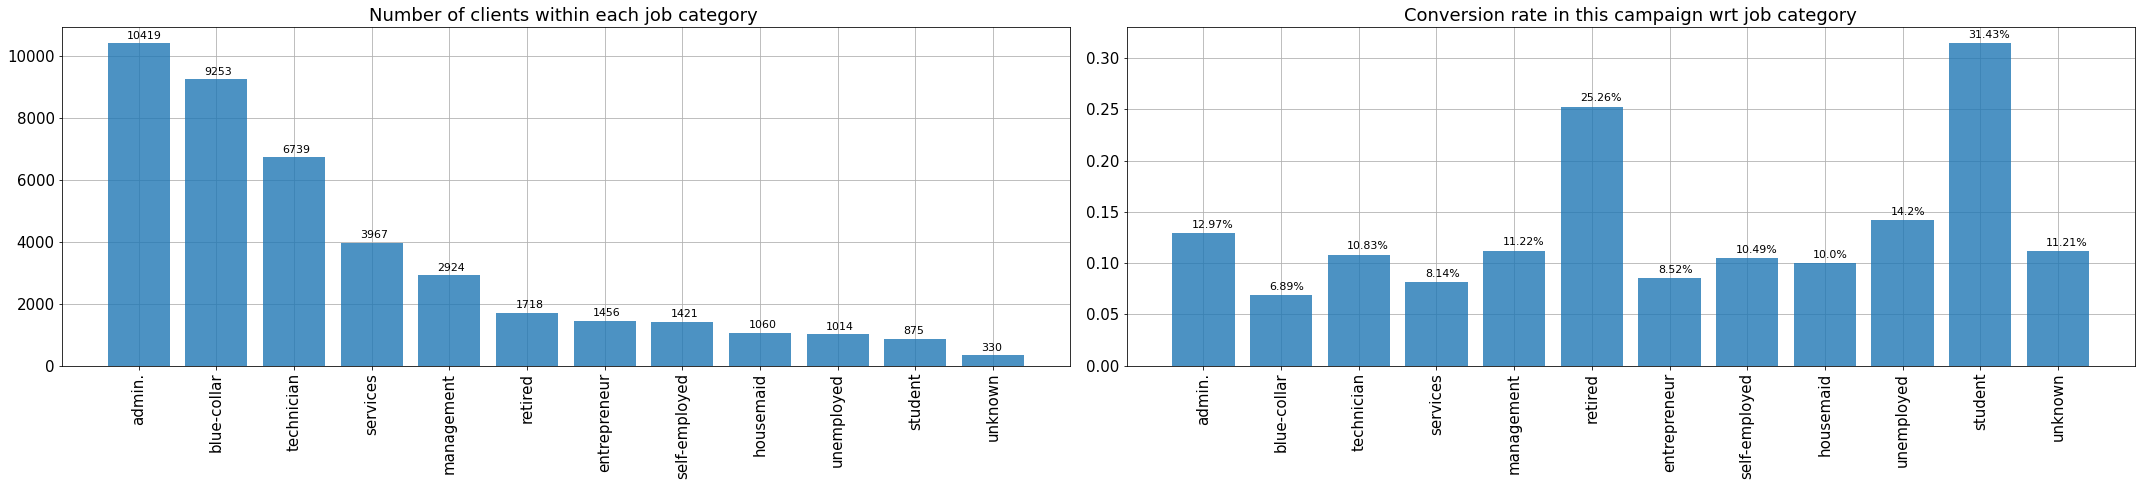

In [23]:
category_proportion_conversion_plot('job')

Dataset shows that the bank is approaching a lot of people with admin and blue collar jobs(~25%, ~22%), way more than the students or unemployed. The conversion rate for the categories like Student, Retired personal and Unemployed is higher than the admin( but the sample size is small). This means if we talk about only the CAC(cost of customer acquisition) if everything else remains the same, the chance of success when approaching a student is higher than when approaching the admin. CAC is less for student. Also interestingly the conversion for blue collar is the lowest, indicating that its tough to convert a blue collar client to take subscription. We can come up with some incentives specifically for the Blue collar clients. <br>

It is very likely that the transaction amount for the two varies, student may get a term deposit of `$`100 and the admin may get a term deposit of `$`10000 per subscription, we do not have that information otherwise I would have compared the `$` values as well.

What is the distribution of jobs among our subscribers and those who did not subscribe?

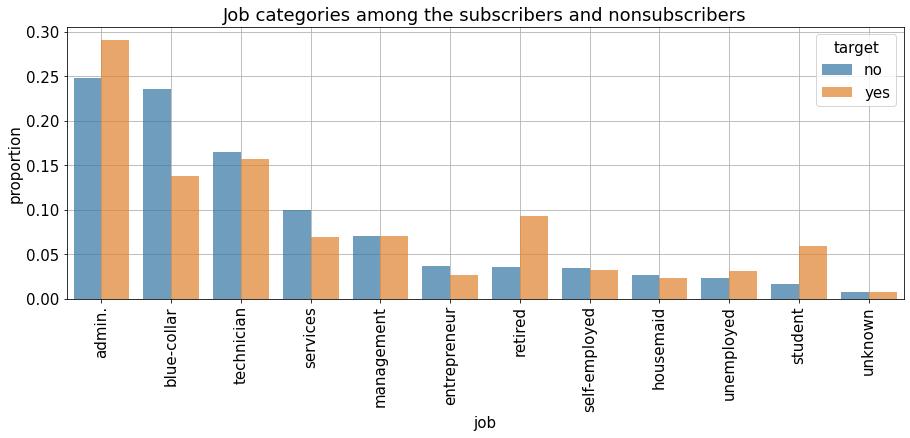

In [88]:
group_comparison('job', 'Job categories among the subscribers and nonsubscribers' )

As noted above, the share of admin, retired and student is high in the subscribers whereas the blue collar has low share amongs the subscribers compared to the non subscribers.

### marital status

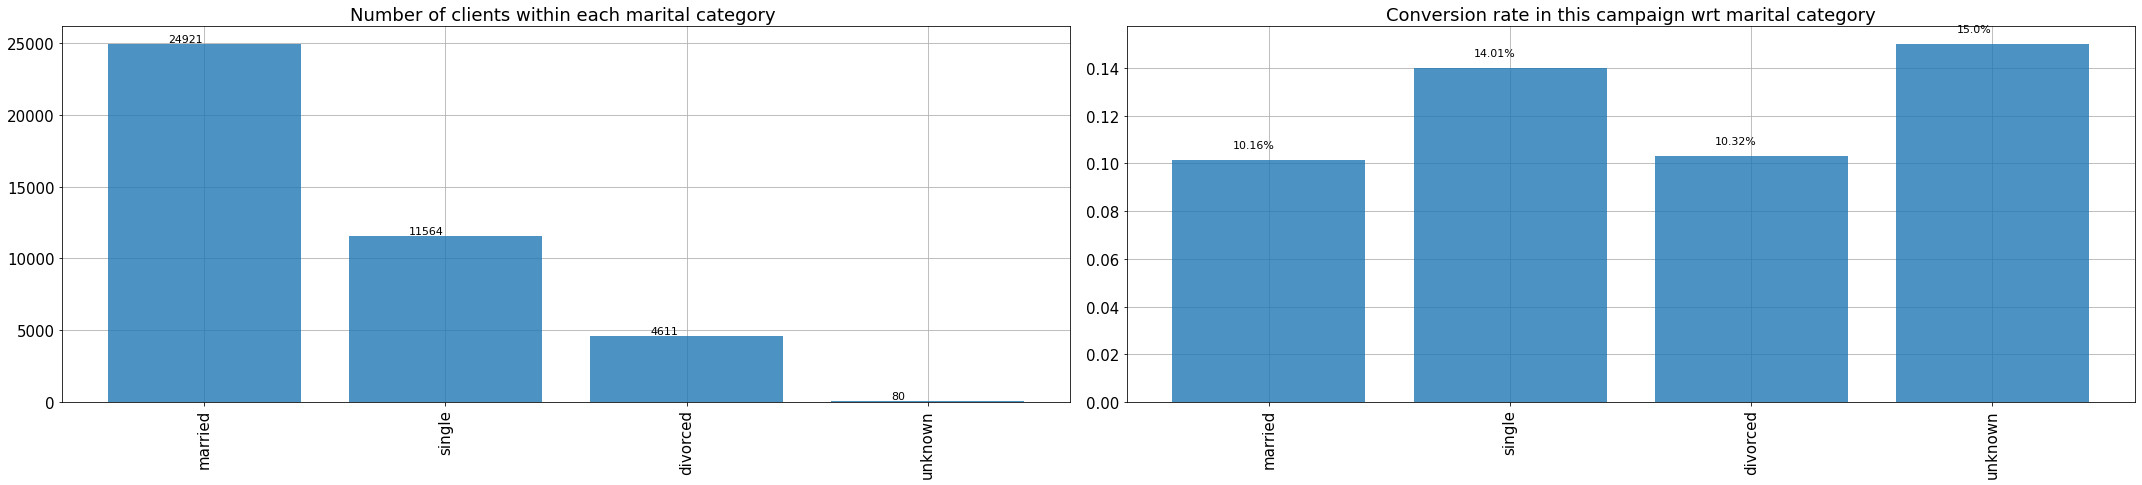

In [25]:
category_proportion_conversion_plot('marital')

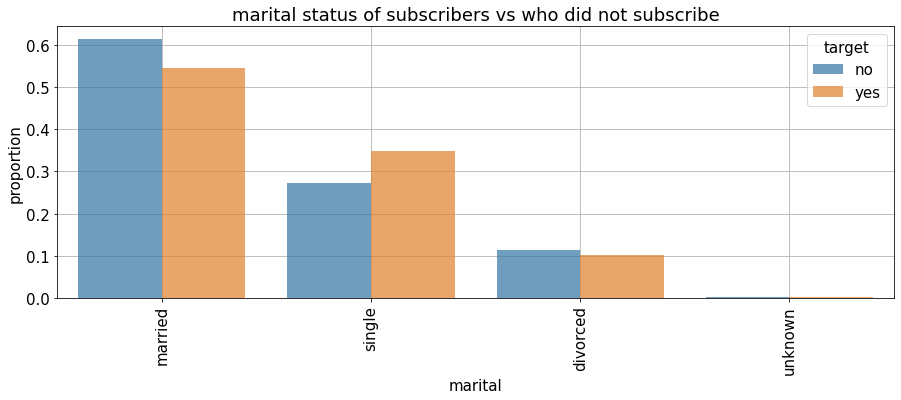

In [26]:
group_comparison('marital', 'marital status of subscribers vs who did not subscribe')

Most of the clients contacted are married (~60%) followed by Single(28%). However the conversion rate of single is higher than the married and divorced clients.
Share of single clients is higher amongst those who subscribe. Share of married drops by a margin of ~ 1 percent, not so much for divorced.

### education

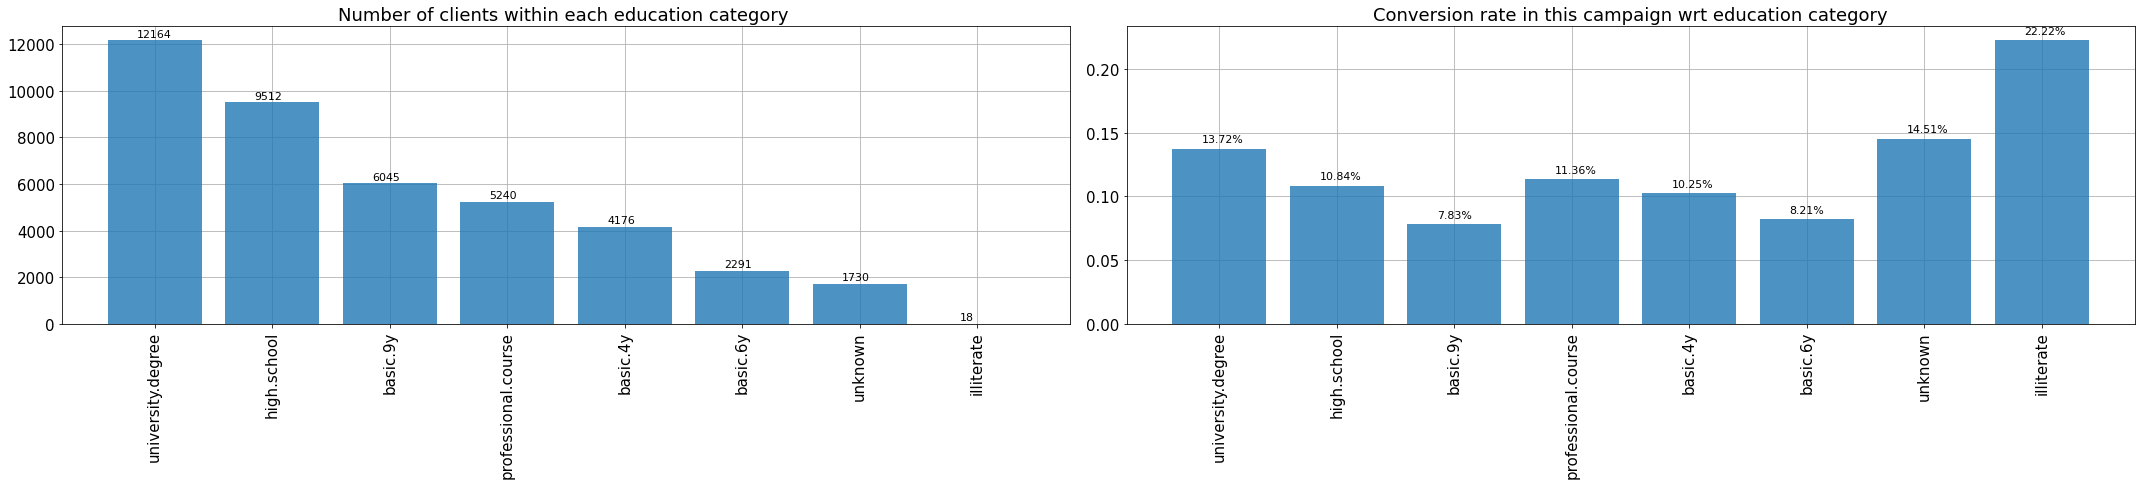

In [27]:
category_proportion_conversion_plot('education')

education: Majority of the clients hold University degree(~30%). The conversion rate for these clients is ~14%. This means out of 100 clients with university degree approached 14 are likely to get the subscription.

How educated are our subscribers vs non subscribers?

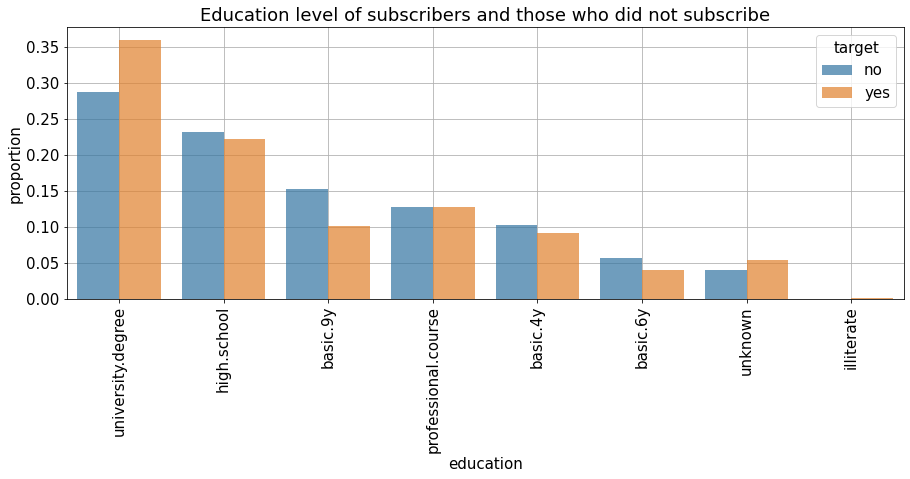

In [28]:
group_comparison('education', 'Education level of subscribers and those who did not subscribe')

Share of clients with university degree is higher and those with basic 9y education is lower amongst the subscribers when compared with the non subscribers.

### default 

posx and posy should be finite values
posx and posy should be finite values


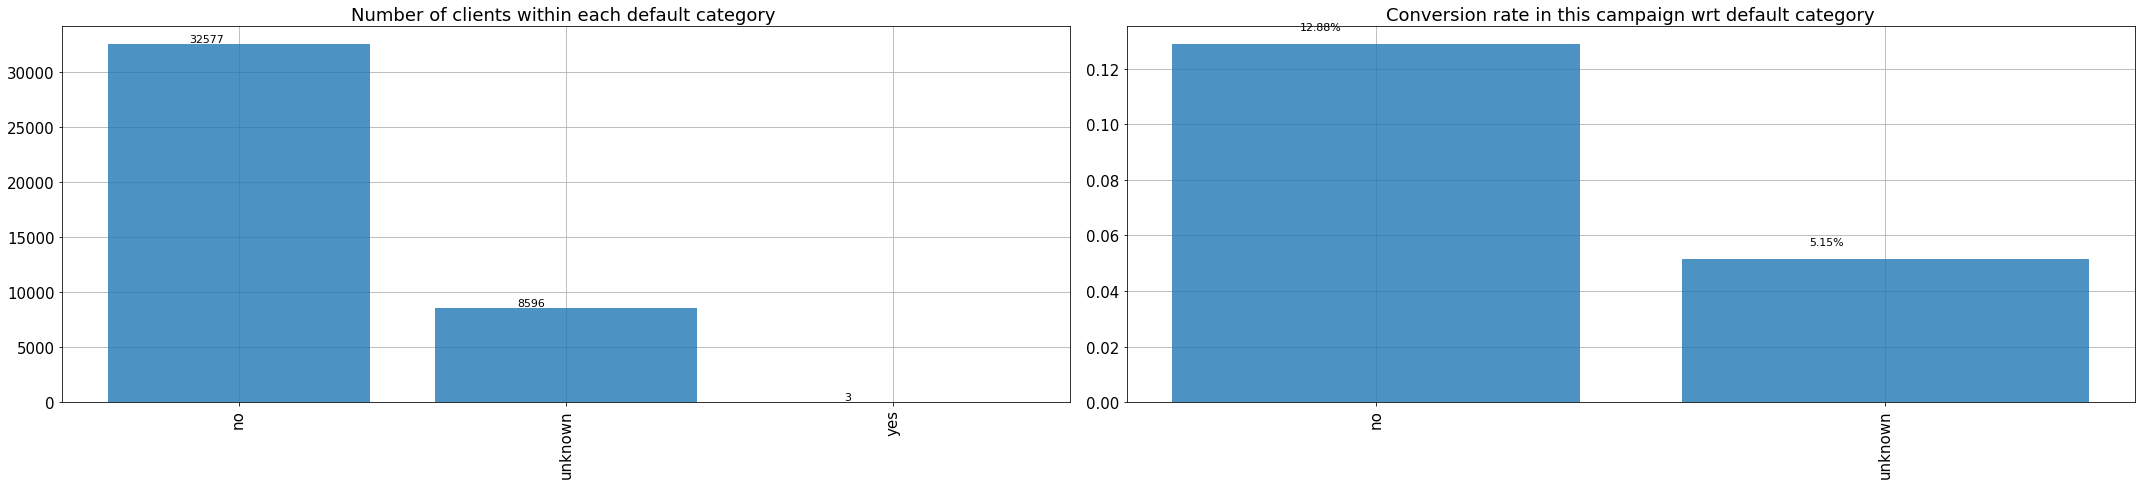

In [29]:
category_proportion_conversion_plot('default')

default: Around 80% clients who were contacted do not have a default history. Having a default on your profile does impact your credit score and overall financial trustability. That could be the reason the marketing campaign is not focussing on the people who had a default. EVen a few who were contacted (3) no one took the subscription.

### housing


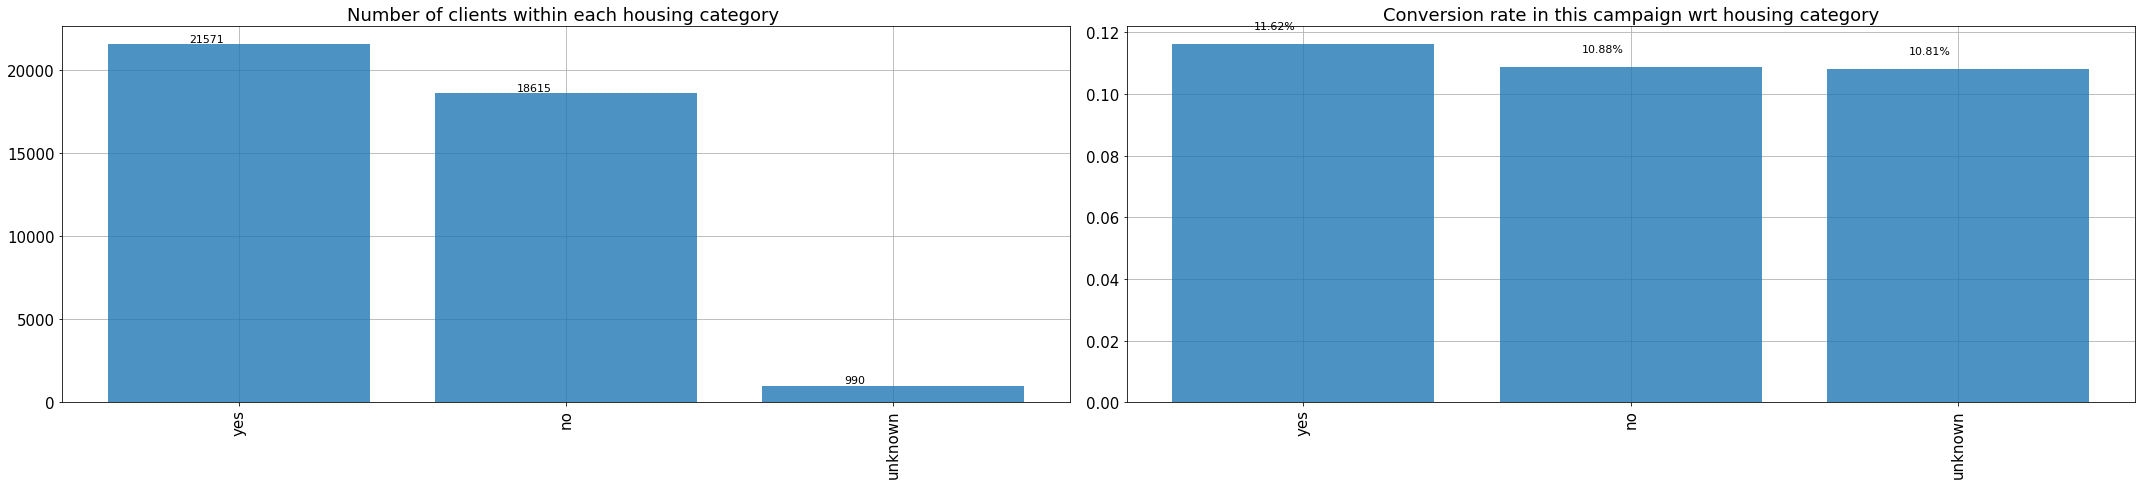

In [30]:
category_proportion_conversion_plot('housing')

The split for clients with and without housing loan is not substantially different (21500 vs 18600). Also there conversion rate is close. 


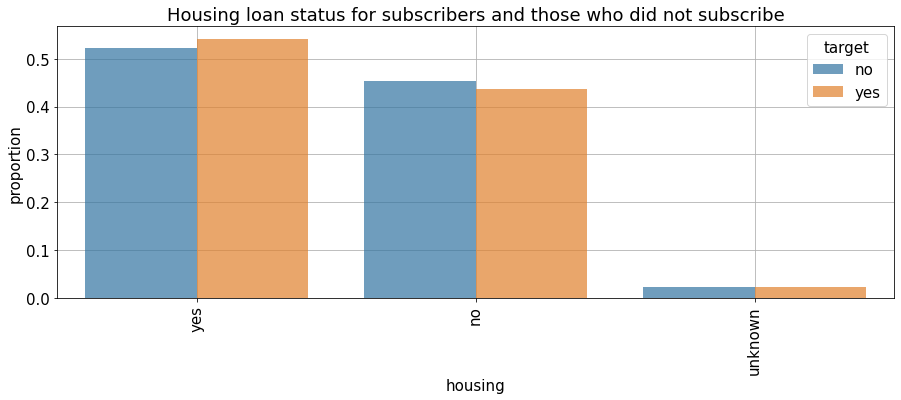

In [31]:
group_comparison('housing', 'Housing loan status for subscribers and those who did not subscribe')

The share of people with housing loan in subscribers vs non subscribers is not too different.

### Loan

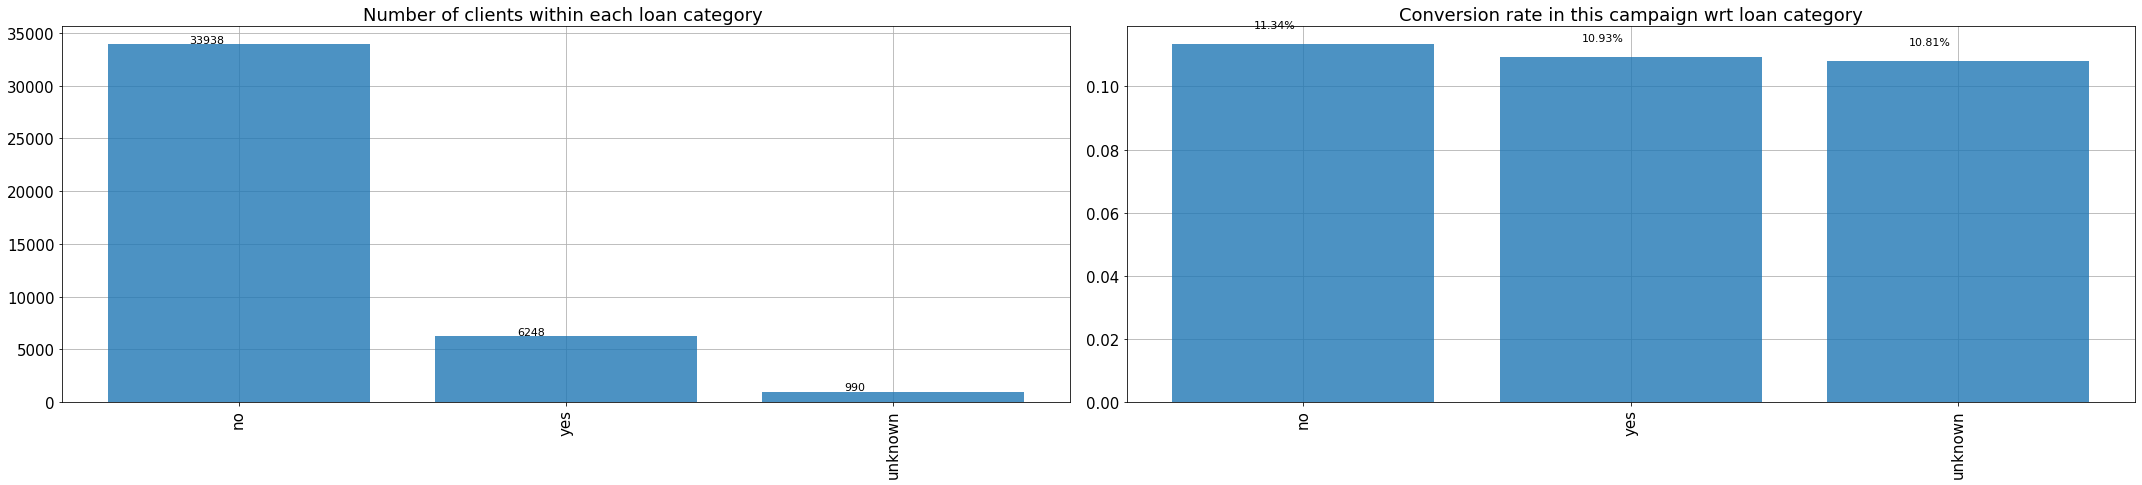

In [32]:
category_proportion_conversion_plot('loan')


loan: Over 80% clients who were contacted do not have any other personal loan. The conversion rate is around 11%.


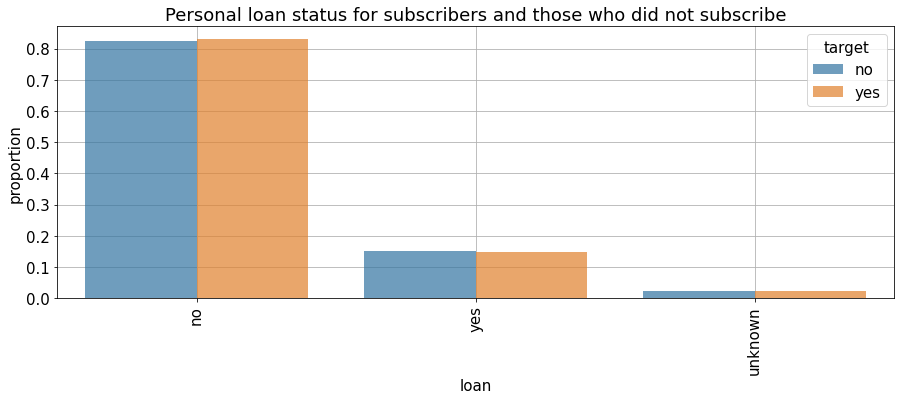

In [33]:
group_comparison('loan', 'Personal loan status for subscribers and those who did not subscribe')

The share of people with and without personal loan in subscribers vs non subscribers is not too different.

### Contact

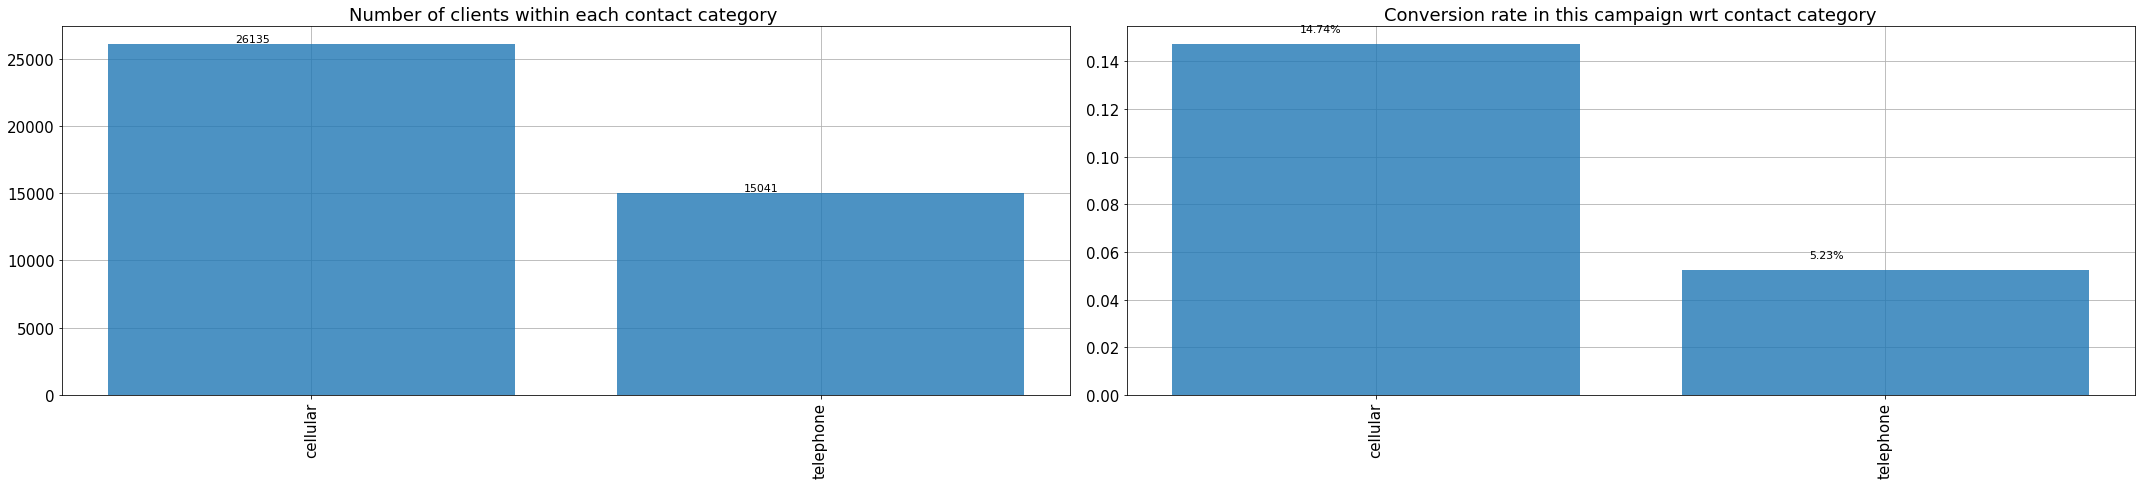

In [34]:
category_proportion_conversion_plot('contact')

contact: Over 60% clients were contacted through cellular method and the team got a conversion rate of 15% which seems pretty decent when compared to other categories above. The conversion rate for clients contacted via telephone is pretty low(5%). This is insightful.


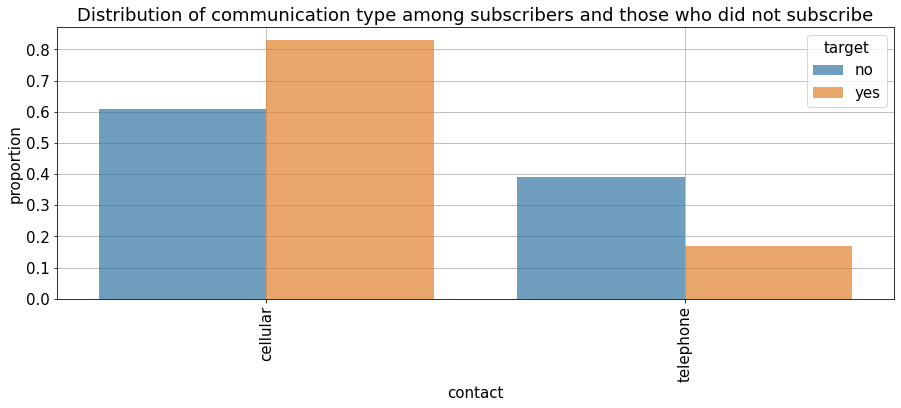

In [35]:
group_comparison('contact', 'Distribution of communication type among subscribers and those who did not subscribe')

Interesting, the share of clients approached through cellular method is quite high in subscriber base whereas the share of those approached through telephone had fallen.


### Month

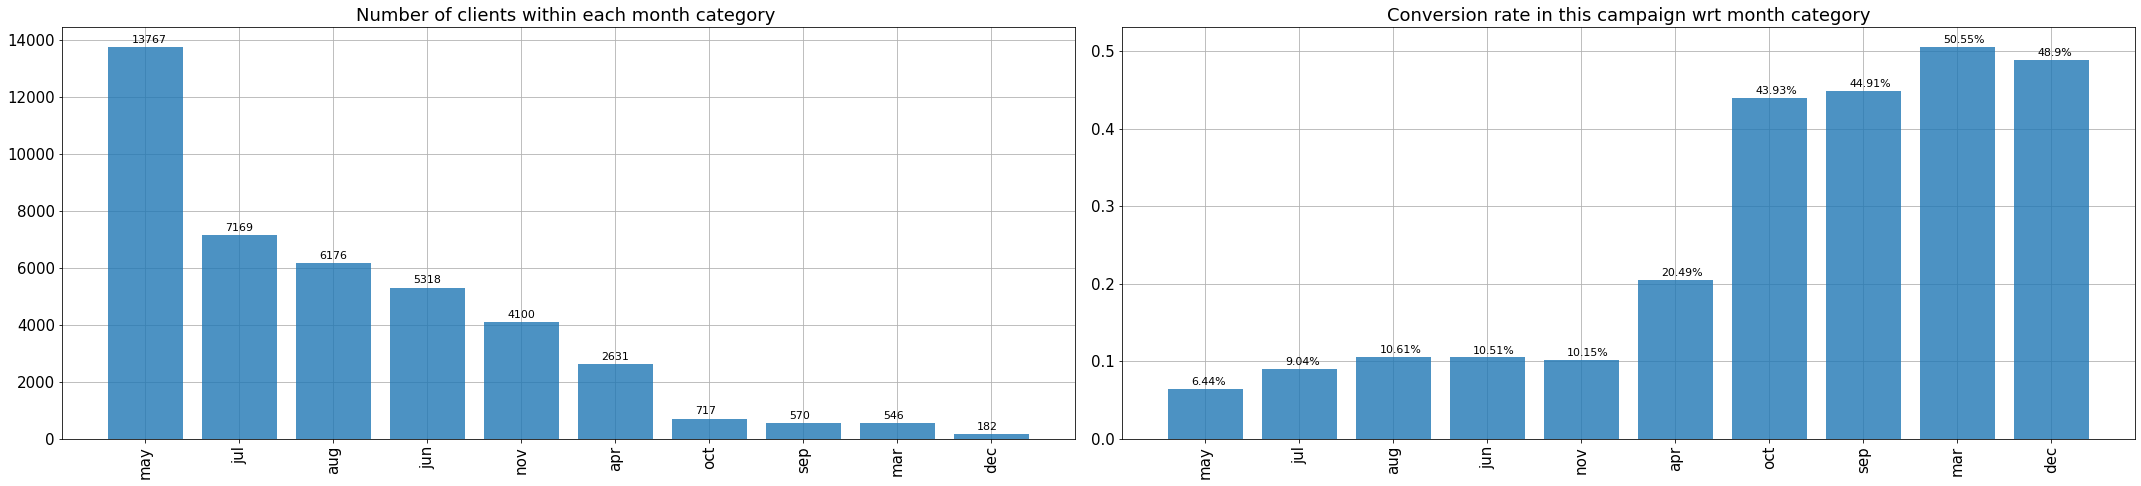

In [36]:
category_proportion_conversion_plot('month')

month: For most of the clients the last concact was made in May ~ 32%(13767) followed by july ~18%(7169). There is no last contact from January and February. Fewer clients were contacted in December and March. Conversion rate for clients last contacted in May is low ~6.4%.


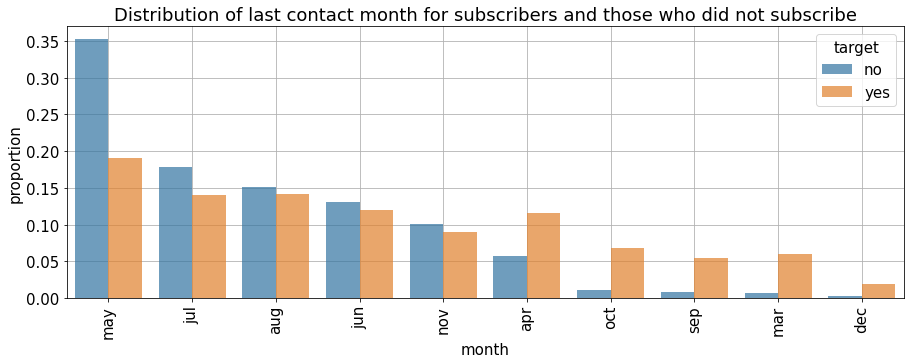

In [37]:
group_comparison('month', 'Distribution of last contact month for subscribers and those who did not subscribe')

There is some difference in the distribution of months when the client was last contacted among subscribers and non subscribers. 

### Day of the week

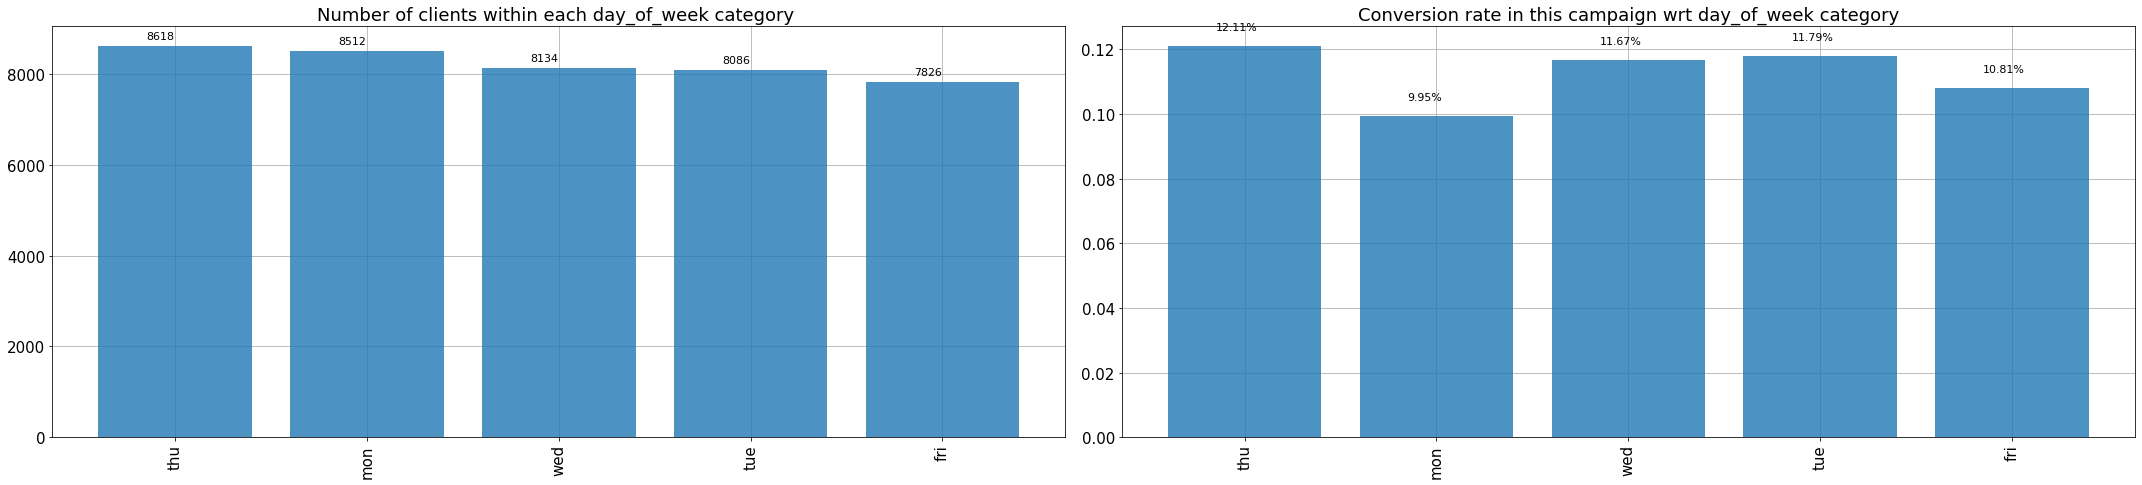

In [38]:
category_proportion_conversion_plot('day_of_week')


day of week: Last contact day of the week is uniform across all the working days more or less. This features may not be helpful in predicting the target variable. Even the conversion rate is quite close for these days.

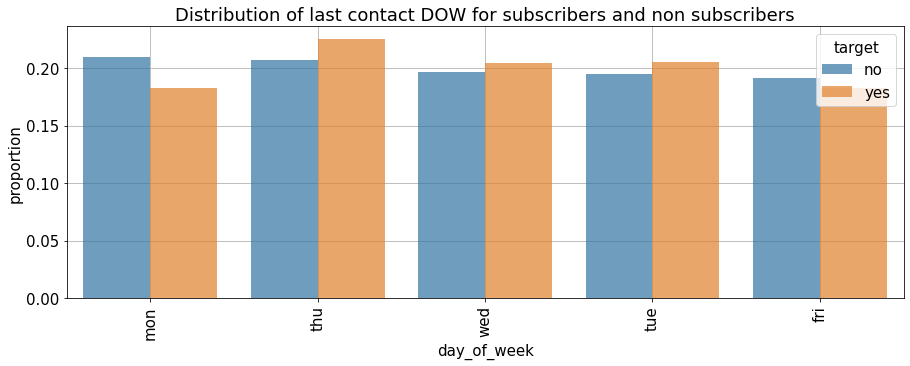

In [89]:
group_comparison('day_of_week','Distribution of last contact DOW for subscribers and non subscribers')

No noticeable difference in the distribution.

### duration
Last contact duration in seconds. 
- Important note: this attribute highly affects the output target (e.g., if duration=0 then y=‘no’). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [40]:
data.duration.describe()

count    41176.000000
mean       258.315815
std        259.305321
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

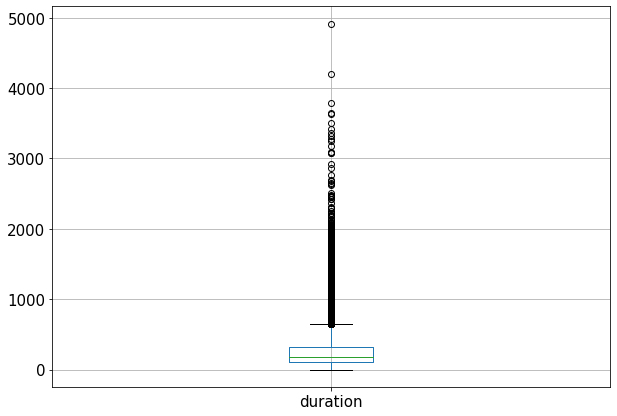

In [41]:
data.boxplot('duration')

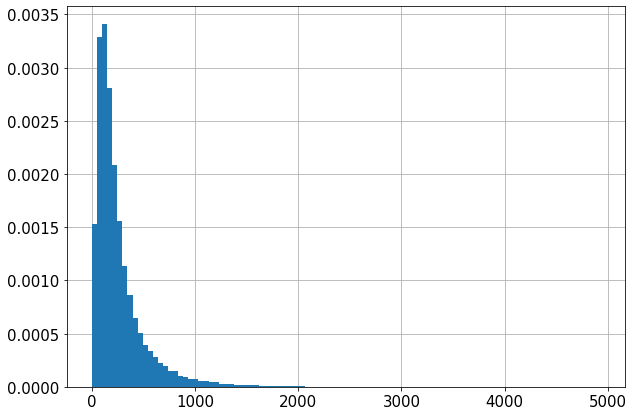

In [42]:
plt.hist(data.duration, density = True, bins = 100)
plt.grid()
plt.show()

This is a clear power law graph. The duration of the call is an unknown quantity before a call is made. The intention of our model is to predict if the client is likely to Subscribe or not. In this setup it doesnt make sense to include this feature in the model. I will remove it.


## Other attributes related to last campaign

### Campaign
number of contacts performed during this campaign and for this client 

In [43]:
data.campaign.describe()

count    41176.000000
mean         2.567879
std          2.770318
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

Text(0, 0.5, 'Number of contacts')

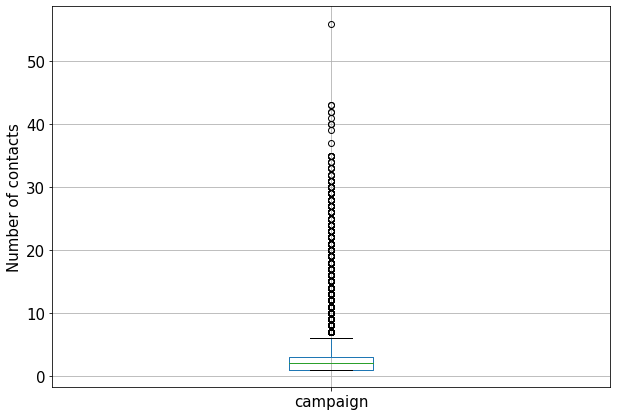

In [44]:
data.boxplot('campaign')
plt.ylabel('Number of contacts')

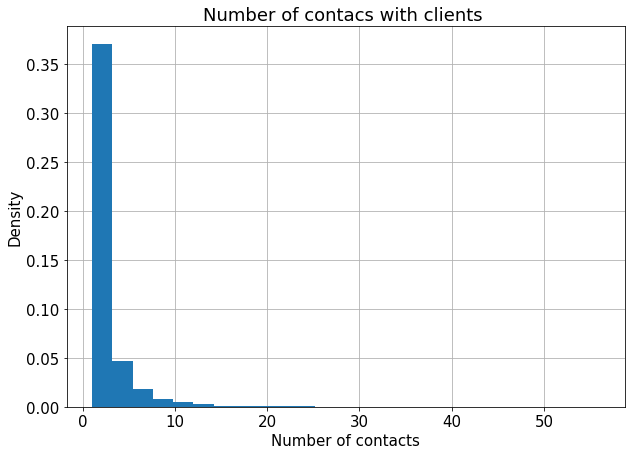

In [90]:
plt.hist(data.campaign, density = True, bins = 25)
plt.ylabel('Density')
plt.xlabel('Number of contacts')
plt.title('Number of contacs with clients ')
plt.grid()
plt.show()

In [46]:
data.campaign.value_counts(normalize = True)

1     0.428259
2     0.256654
3     0.129687
4     0.064358
5     0.038833
6     0.023776
7     0.015276
8     0.009714
9     0.006873
10    0.005464
11    0.004299
12    0.003036
13    0.002234
14    0.001676
17    0.001409
16    0.001239
15    0.001239
18    0.000801
20    0.000729
19    0.000631
21    0.000583
22    0.000413
23    0.000389
24    0.000364
27    0.000267
29    0.000243
28    0.000194
26    0.000194
25    0.000194
31    0.000170
30    0.000170
35    0.000121
32    0.000097
33    0.000097
34    0.000073
42    0.000049
40    0.000049
43    0.000049
56    0.000024
39    0.000024
41    0.000024
37    0.000024
Name: campaign, dtype: float64

How many clients were contacted >=4 times?

In [47]:
data.campaign.value_counts(normalize = True)[3:].sum()

0.185399261705848

How many of those clients actually subscribed?

In [48]:
data[data.campaign>=4].target.value_counts(normalize = True)

no     0.927299
yes    0.072701
Name: target, dtype: float64

For clients who subscribed, what was the proportion of contacts made?

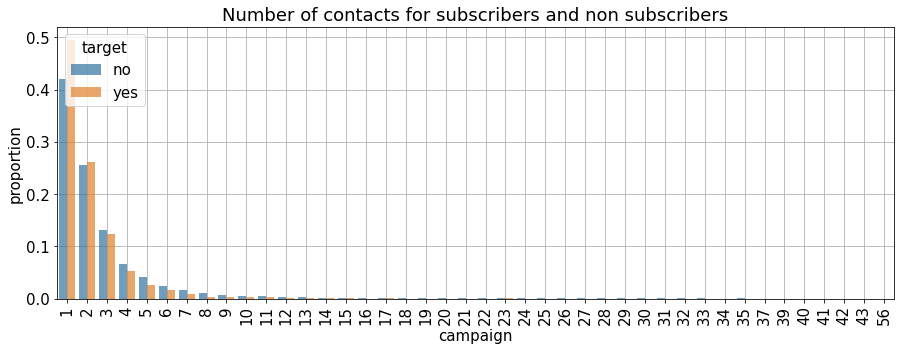

In [92]:
group_comparison('campaign','Number of contacts for subscribers and non subscribers')

In [49]:
data[data.target == 'yes'].campaign.value_counts(normalize = True)

1     0.495581
2     0.261048
3     0.123734
4     0.053675
5     0.025868
6     0.016167
7     0.008191
8     0.003665
9     0.003665
10    0.002587
11    0.002587
17    0.000862
13    0.000862
12    0.000647
15    0.000431
23    0.000216
14    0.000216
Name: campaign, dtype: float64

In [50]:
data[data.target == 'yes'].campaign.value_counts(normalize = True)[:3].sum()

0.8803621470144428

In 18% cases the clients were contacted 4 or more times. Otherwise most of the engagements are 3 or less than 3 contacts. For the clients who were contacted 4 or more times only 7% subscribed. <br>

Another way to look at it, for all the clients who subscribed(YES), 88% were contacted <=3 times. 

### pdays

In [51]:
data.pdays.unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

Proportion of number of days that passed by after the client was last contacted from a previous campaign.

In [52]:
data.pdays.value_counts(normalize = True)

999    0.963207
3      0.010662
6      0.010006
4      0.002866
9      0.001554
2      0.001481
7      0.001457
12     0.001409
10     0.001263
5      0.001117
13     0.000874
11     0.000680
1      0.000631
15     0.000583
14     0.000486
8      0.000437
0      0.000364
16     0.000267
17     0.000194
18     0.000170
22     0.000073
19     0.000073
21     0.000049
25     0.000024
26     0.000024
27     0.000024
20     0.000024
Name: pdays, dtype: float64

This data shows vast majority(>96%) of clients (pdays value = 999)  were not previously contacted in a previous campaign.

In [53]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'target'],
      dtype='object')

### previous

Whats the distribution of number of contacts with the clients before this campaign

In [54]:
data.previous.value_counts(normalize = True)

0    0.863391
1    0.110768
2    0.018312
3    0.005246
4    0.001700
5    0.000437
6    0.000121
7    0.000024
Name: previous, dtype: float64

Is there a difference in the distribution of number of contacts among the subscribers vs those who did not subscribe.

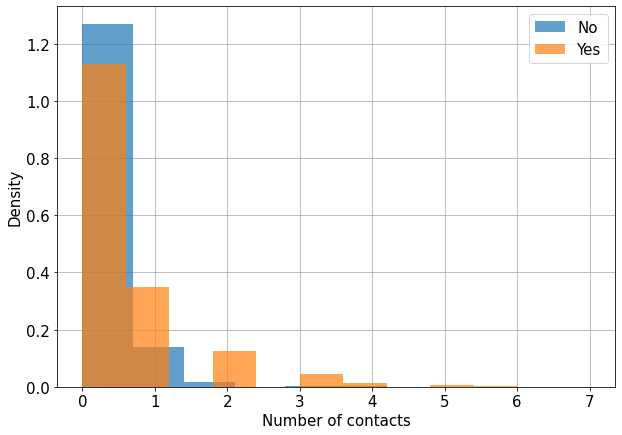

In [56]:
plt.hist(data[data.target == 'no'].previous,  density = True, alpha = 0.7, label = 'No')
plt.hist(data[data.target == 'yes'].previous,  density = True, alpha = 0.7, label = 'Yes')
plt.xlabel('Number of contacts')
plt.ylabel('Density')
plt.grid()
plt.legend()
plt.show()

There was no previous contact for 86.33 % clients. Also there is no substantial difference in the distribution of number of previous contacts among the subscribers and non subscribers.

### poutcome

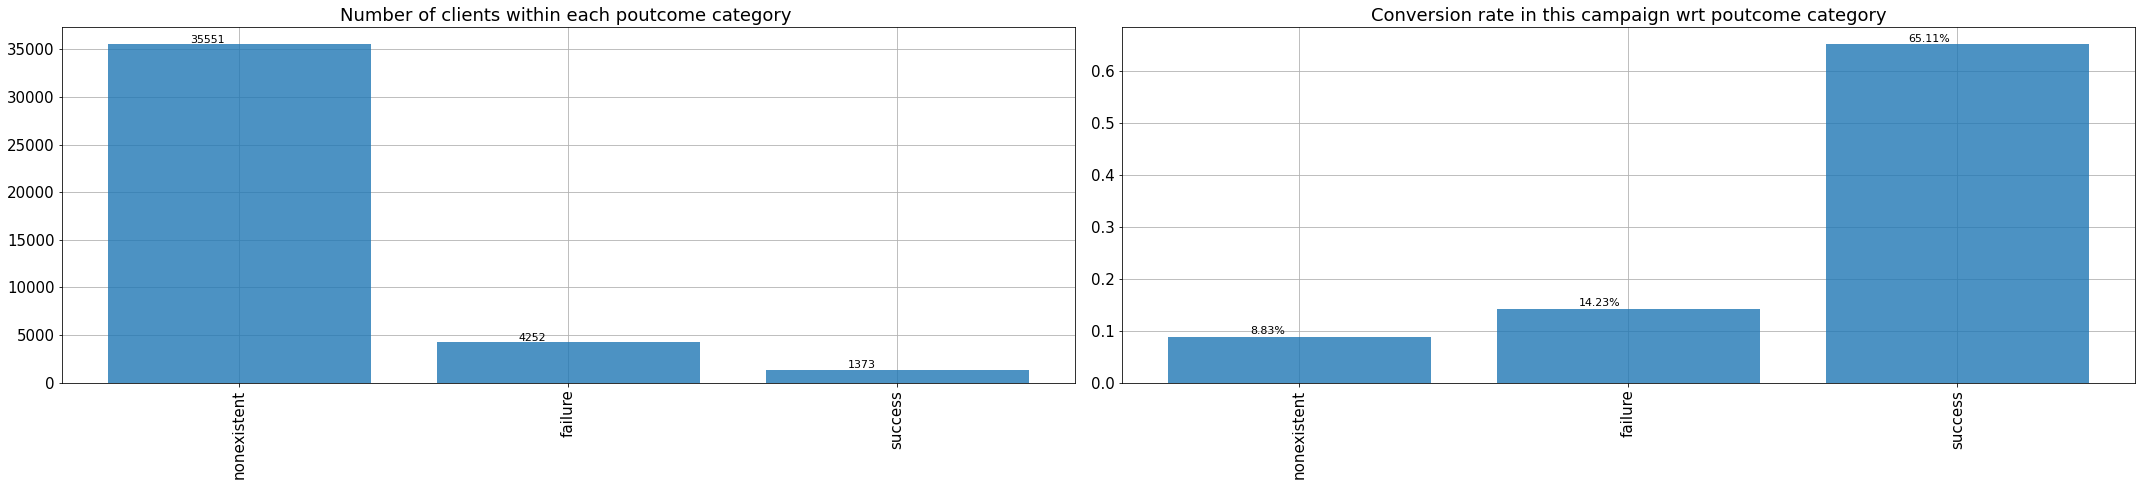

In [57]:
category_proportion_conversion_plot('poutcome')

When there was no previous contact (previous = 0), what is the poutcome?

In [58]:
data[data.previous == 0].poutcome.unique()

array(['nonexistent'], dtype=object)

When there was a previous contact (previous != 0), what is the poutcome?

In [59]:
data[data.previous != 0].poutcome.unique()

array(['failure', 'success'], dtype=object)

poutcome: outcome of the previous marketing campaign was majorly non existent for most of the clients this is because there was no previous contact with 86.33% clients. <br> 
From the above plot we notice out of the clients who had previously subscribed it is more likely for them to subscribe again(65%). For the clients where it was a failure last time(Did not subscribe) 14% subscribed this time. It would be interesting to to know what changed their minds.

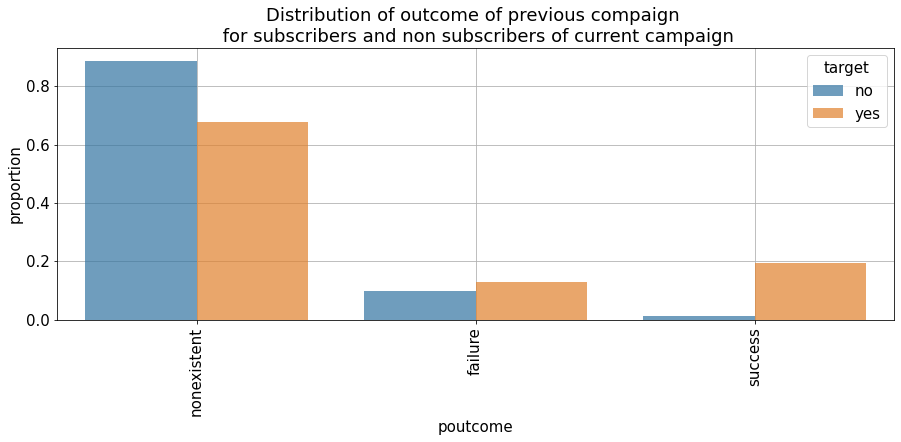

In [60]:
group_comparison('poutcome', 'Distribution of outcome of previous compaign \n for subscribers and non subscribers of current campaign' )

Distribution looks different for the two target groups. There is substantial contribution from the clients who subscribed last time to current subscriber base. This could probably be more of customer loyalty.

## social and economic context attributes

### emp.var.rate
employment variation rate 

In [61]:
data['emp.var.rate'].value_counts()

 1.4    16228
-1.8     9182
 1.1     7762
-0.1     3682
-2.9     1662
-3.4     1070
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

There are only 10 distinct values of employment variation rate. Binning into a histogram wont be a good representation and will be a deceiving. A lot would depend on the bin size and the distinct values in the variable. I will prefer comparing the proportion for each distinct value of employment variation rate rather than binning it.

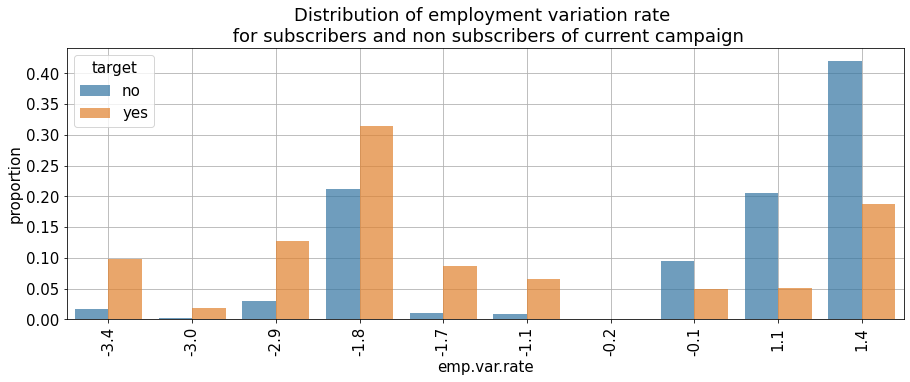

In [62]:
group_comparison('emp.var.rate','Distribution of employment variation rate \n for subscribers and non subscribers of current campaign')

Some difference in the distribution of employment variation rate for the two target groups. Frequent higher values for those who did not subscribe.

### cons.price.idx
consumer price index 

In [63]:
data['cons.price.idx'].value_counts()

93.994    7762
93.918    6681
92.893    5793
93.444    5173
94.465    4374
93.200    3615
93.075    2457
92.201     770
92.963     715
92.431     446
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     177
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

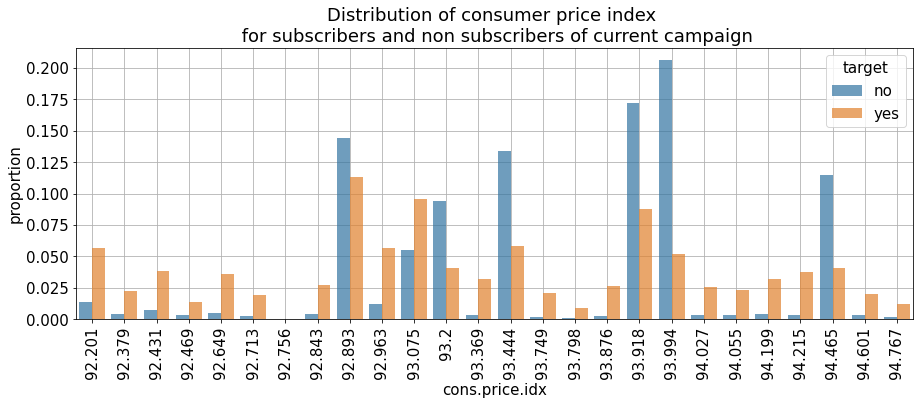

In [64]:
group_comparison('cons.price.idx','Distribution of consumer price index \n for subscribers and non subscribers of current campaign' )

There is a difference in the distribution across the two target groups.

### cons.conf.idx
consumer confidence index 

In [65]:
data['cons.conf.idx'].value_counts()

-36.4    7762
-42.7    6681
-46.2    5793
-36.1    5173
-41.8    4374
-42.0    3615
-47.1    2457
-31.4     770
-40.8     715
-26.9     446
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     177
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

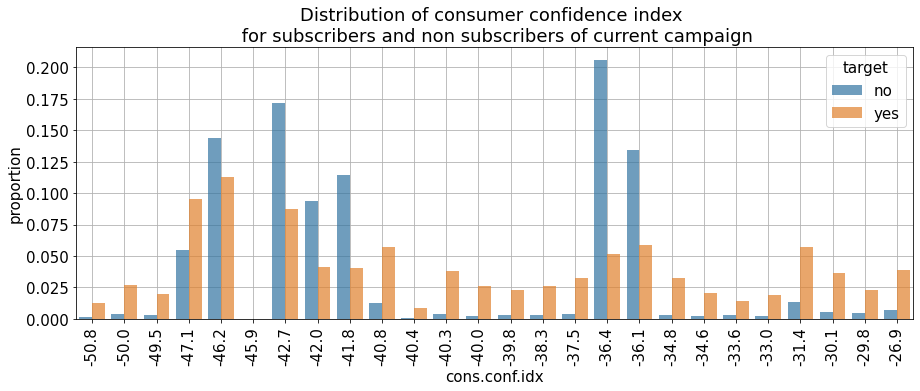

In [66]:
group_comparison('cons.conf.idx','Distribution of consumer confidence index \n for subscribers and non subscribers of current campaign')

### euribor3m
euribor 3 month rate

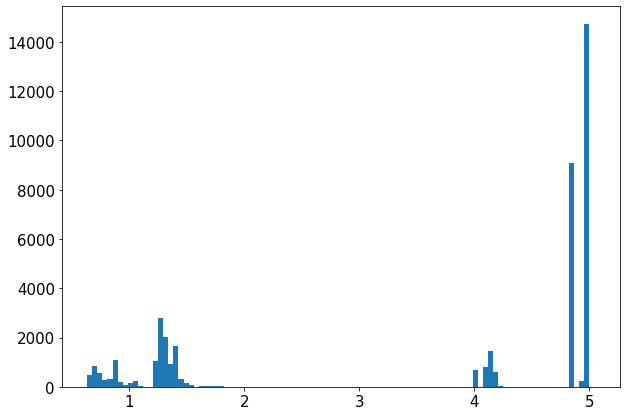

In [67]:
plt.hist(data['euribor3m'],100)
plt.show()

In [68]:
len(data['euribor3m'].unique())

316

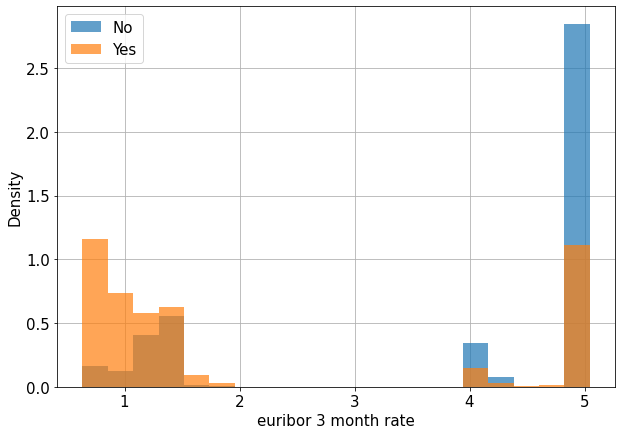

In [70]:
plt.hist(data[data.target == 'no'].euribor3m,bins = 20, density = True, alpha = 0.7, label = 'No')
plt.hist(data[data.target == 'yes'].euribor3m,bins = 20, density = True, alpha = 0.7, label = 'Yes')
plt.ylabel('Density')
plt.xlabel('euribor 3 month rate')
plt.grid()
plt.legend()
plt.show()

Some variation in the distribution among the subscribers and those who did not.

### nr.employed
number of employees

In [71]:
data['nr.employed'].value_counts()

5228.1    16228
5099.1     8532
5191.0     7762
5195.8     3682
5076.2     1662
5017.5     1070
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

This variable has only 11 distinct values.

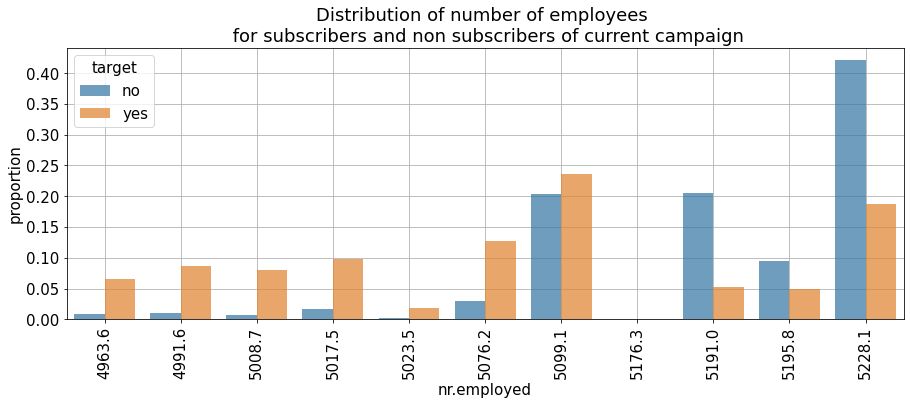

In [72]:
group_comparison('nr.employed','Distribution of number of employees \n for subscribers and non subscribers of current campaign' )

Seems like there is some variation.

# Correlated features

In [73]:
corr = data.corr()

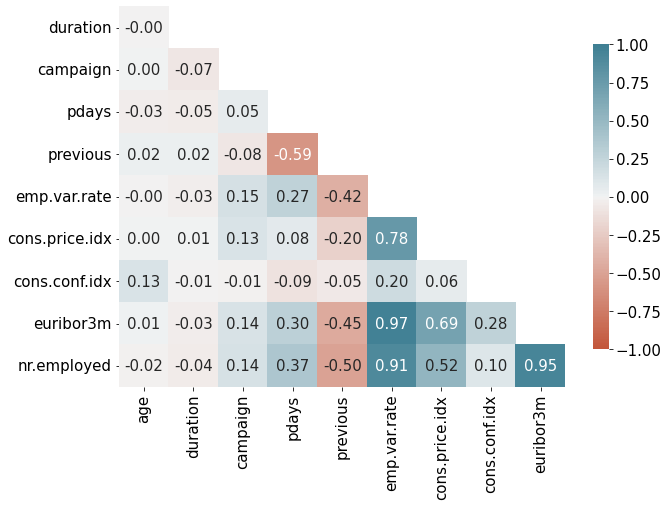

In [74]:
# Plotting the heatmap 

mask = np.triu(np.ones_like(corr, dtype=np.bool_))
mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=sns.diverging_palette(20, 220, n=200),
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
plt.yticks(rotation=0)
plt.show()

There are correlated features in our dataset. There are repercussions of having multicollinearity in the features. This impacts our ability to interpret the contribution of the feature towards the final prediction. Algorithms for instance linear regression assume that the features are independent. In case of multi collinearity the standard error of regression coefficients is not reliable. The coefficients may swing wildly and become sensitive to small changes in the model. The model predicability is not impacted as much but the intrepretability is.Tacos Tuesday is a classic example. This can be verified on case by case basis. However that does not mean we cannot use them when our sole purpose is to do predictions only.









NOTE:

`The fact that some or all predictor variables are correlated among themselves does not, in general, inhibit our ability to obtain a good fit nor does it tend to affect inferences about mean responses or predictions of new observations.  — Applied Linear Statistical Models, p289, 4th Edition.`




Now the question is what is the objective here. If we are not interested in the features at all then we can simply ignore this correlation and move on. But if our objective is the interpret the features as well then there are a few things we can do to counter this.
1. Remove some of the features <br>
2. PCA dimensionality reduction will give us orthogonal components and hence eliminating any correlation between them.<br>
3. If possible combine the features if we know enough details about the behaviour of the features.
4. Use regularization(Lasso) which will eliminate some of the features.

I am assuming the objective is to make strong predictions. I will not remove any feature for now and see how the model performs. We can remove the features based on the performance of the model.

# END